In [ ]:
# Install Python libraries
pip install requests beautifulsoup4 requests-html
pip install requests

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup
import os
from collections import Counter
import re
from tabulate import tabulate

In [ ]:
# Enter the boardgame url
# Ref: url for page 1 > https://boardgamegeek.com/browse/boardgame/page/1

import requests

base_url = 'https://boardgamegeek.com/browse/boardgame/page/'

# Set the page number = 2 for testing. 
# The total page is 1482, but we would like to focus on hot games so set total page = 100
# Total_pages = 2
total_pages = 100

In [285]:
# Create an empty list for storing game
game_titles = []
game_descriptions = []
game_ratings1 = []
game_ratings2 = []
game_ratings3 = []
game_votes = []
game_release_years = []

# Loop through all pages
for page_number in range(1, total_pages + 1):
    # Construct the URL for the current page
    page_url = f'{base_url}{page_number}'

    # Send an HTTP GET request to the URL
    response = requests.get(page_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract all the board game information for the current page
        titles = soup.find_all('a', class_='primary')
        descriptions = soup.find_all('p', class_='smallefont dull')
        ratings1 = soup.find_all('td', class_='collection_bggrating')
        ratings2 = soup.find_all('td', class_='collection_objectname')
        release_years = soup.find_all('span', class_='smallerfont dull')

        # Loop through the elements and append data to the respective lists
        for title, description, ratings1, ratings2, release_years  in zip(titles, descriptions, ratings1, ratings2, release_years):
            game_titles.append(title.text.strip())
            game_descriptions.append(description.text.strip())
            game_ratings1.append(ratings1.text.strip())
            game_ratings2.append(ratings2.find_next('td').text.strip())
            game_ratings3.append(ratings2.find_next('td').find_next('td').text.strip())
            game_votes.append(ratings2.find_next('td').find_next('td').find_next('td').text.strip())
            
            release_year_text = release_years.text.strip()
            release_year_text = release_year_text.strip('()')
            game_release_years.append(release_year_text)
            
           

    else:
        print(f"Failed to retrieve page {page_number}.")

# Create a DataFrame from the collected data
df = pd.DataFrame({
    'Game Title': game_titles,
    'Description': game_descriptions,
    'Greek Rating': game_ratings2,
    'Average Rating': game_ratings3,
    'Votes': game_votes, 
    'Release Years': game_release_years
})


# Print the first 3 row of the DataFrame
print(df.head(3))

                  Game Title  \
0          Brass: Birmingham   
1  Pandemic Legacy: Season 1   
2                 Gloomhaven   

                                         Description Greek Rating  \
0  Build networks, grow industries, and navigate ...        8.424   
1  Mutating diseases are spreading around the wor...        8.389   
2  Vanquish monsters with strategic cardplay. Ful...        8.380   

  Average Rating  Votes Release Years  
0           8.61  40631          2018  
1           8.53  51385          2015  
2           8.61  59509          2017  


In [311]:
# Convert 'Greek Rating' & 'Average Rating'column to float
df['Greek Rating'] = pd.to_numeric(df['Greek Rating'], errors='coerce')
df['Average Rating'] = pd.to_numeric(df['Average Rating'], errors='coerce')

# Convert 'Votes' & 'Release Year' column to integer
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce').astype('Int64')
df['Release Years'] = pd.to_numeric(df['Release Years'], errors='coerce').astype('Int64')

In [312]:
# Check the data types of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 994
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game Title      995 non-null    object 
 1   Description     995 non-null    object 
 2   Greek Rating    995 non-null    float64
 3   Average Rating  995 non-null    float64
 4   Votes           995 non-null    Int64  
 5   Release Years   995 non-null    Int64  
dtypes: Int64(2), float64(2), object(2)
memory usage: 56.4+ KB


In [302]:
#  Check the values in the data frame
df.head()

,Game Title,Description,Greek Rating,Average Rating,Votes,Release Years
0,Brass: Birmingham,"Build networks, grow industries, and navigate ...",8.424,8.61,40631,2018
1,Pandemic Legacy: Season 1,Mutating diseases are spreading around the wor...,8.389,8.53,51385,2015
2,Gloomhaven,Vanquish monsters with strategic cardplay. Ful...,8.380,8.61,59509,2017
3,Ark Nova,"Plan and build a modern, scientifically manage...",8.312,8.53,34520,2021
4,Twilight Imperium: Fourth Edition,"Build an intergalactic empire through trade, r...",8.240,8.61,21640,2017


In [303]:
# Tokenize and count words in the 'Description' column
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/natalielai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/natalielai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [304]:
# Create a list of stopwords to filter out common words
stop_words = set(stopwords.words('english'))


In [305]:
# Tokenize and count words
tokens = []
for description in df['Description']:
    words = word_tokenize(description)
    for word in words:
        word = word.lower()  # Convert to lowercase
        if word.isalpha() and word not in stop_words:  # Filter out non-alphabetic and stop words
            tokens.append(word)

# Count the frequency of each token
token_counts = Counter(tokens)

# Get the most common keywords (top 10 in this example)
most_common_keywords = token_counts.most_common(30)

# Print the most common keywords and their counts
for keyword, count in most_common_keywords:
    print(f"{keyword}: {count}")

build: 144
game: 80
world: 41
race: 40
fight: 39
control: 39
dice: 36
new: 36
use: 35
city: 34
best: 33
cards: 30
team: 29
compete: 29
empire: 28
win: 27
become: 27
develop: 26
explore: 25
battle: 25
together: 24
goods: 24
work: 24
trade: 23
create: 23
take: 23
make: 22
help: 22
power: 22
heroes: 22


In [306]:
# Exclude some common worlds
exclude_words = {'game', 'new', 'best', 'become', 'use', 'cards', 'dice', ' game'}

In [307]:
# Empty the list to store filtered words
tokens = []

for description in df['Description']:
    words = word_tokenize(description)
    for word in words:
        word = word.lower()  # Convert to lowercase
        if word.isalpha() and word not in stop_words and word not in exclude_words:
            tokens.append(word)

# Count the frequency of each token
token_counts = Counter(tokens)

# Get the most common keywords (top 10 in this example)
most_common_keywords = token_counts.most_common(10)


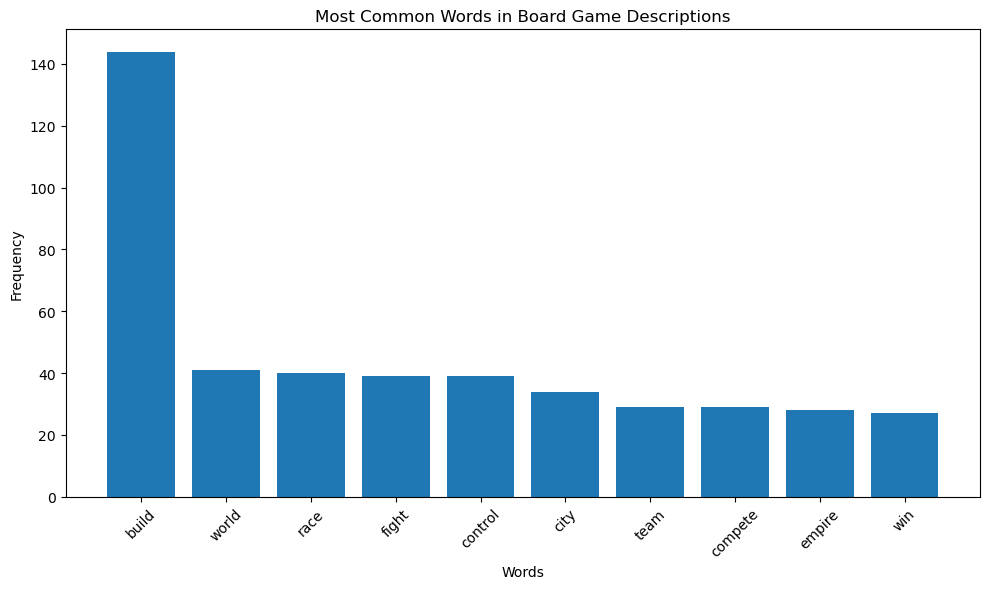

In [308]:
# Plot the graph
words, counts = zip(*most_common_keywords)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Board Game Descriptions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

# Fun fact #1
# In the results, we can find that the most common word is 'Build'

# It seems people would love to theme of building or create somethings

# Fun fact #2
# The wordings like 'race', 'control', and 'fight' are occupied 3rd, 4th, and 5th.

# It seems gamers who enjoy racing games may appreciate the thrill of competition

In [294]:
# Words to exclude
exclude_words = {'the', 'game', 'of', 'edition', 'second', 'a'}

# Tokenize and count words while excluding specified words
tokens = []
for title in df['Game Title']:
    words = word_tokenize(title)
    for word in words:
        word = word.lower()  # Convert to lowercase
        if word.isalpha() and word not in exclude_words:
            tokens.append(word)

# Count the frequency of each token
token_counts = Counter(tokens)

# Get the most common word
most_common_word, most_common_count = token_counts.most_common(1)[0]

print(f"The most common word in game titles is '{most_common_word}' with a count of {most_common_count}.")

# Fun fact #3
# 'war'is the most common word in the game title! 

# War is a popular theme for board games, possibly because this is historically common and universally recognized theme in games and storytelling.
# It provides a strong foundation for the concept of strategy and strategy games.

The most common word in game titles is 'wars' with a count of 22.


In [309]:
# Set the key war
search_word = 'war'

# Tokenize words and filter titles containing the search word
filtered_titles = [title for title in df['Game Title'] if search_word in word_tokenize(title.lower())]

# Sort the DataFrame by 'Rating' in descending order
df.sort_values(by='Greek Rating', ascending=False, inplace=True)

# Filter the DataFrame to include only the top 10 games with 'war' in the title
top_10_war_games = df[df['Game Title'].isin(filtered_titles)].head(10)

# Display the results in a table
table = tabulate(top_10_war_games, headers='keys', tablefmt='grid')
print(table)

+-----+------------------------------------------+---------------------------------------------------------------------------------------+----------------+------------------+---------+-----------------+
|     | Game Title                               | Description                                                                           |   Greek Rating |   Average Rating |   Votes |   Release Years |
+=====+==========================================+=======================================================================================+================+==================+=========+=================+
|   8 | War of the Ring: Second Edition          | The Fellowship and the Free Peoples clash with Sauron over the fate of Middle-Earth.  |          8.175 |             8.53 |   19683 |            2011 |
+-----+------------------------------------------+---------------------------------------------------------------------------------------+----------------+------------------+---------+----

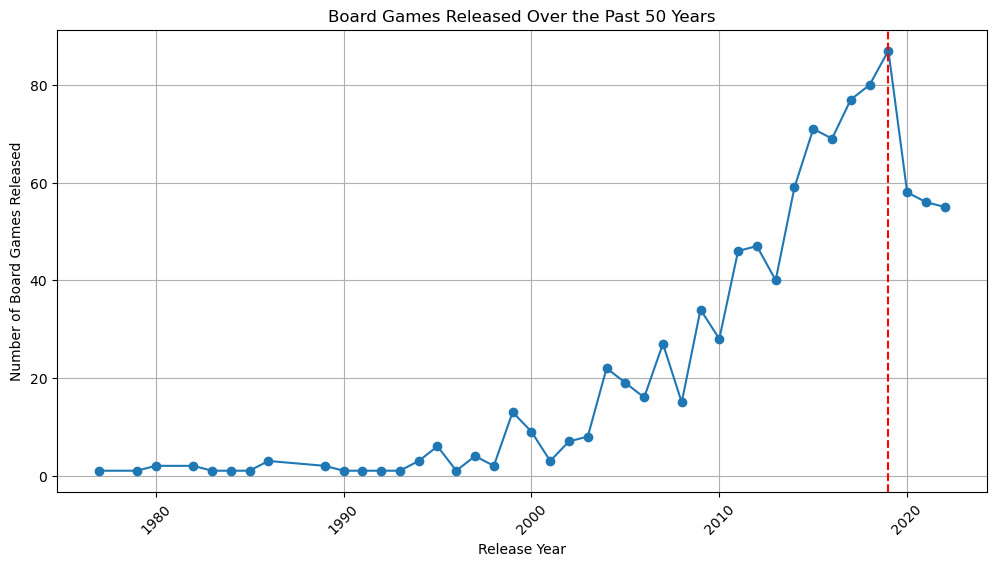

In [313]:
# Filter the games which released in the past 50 years
filtered_df = df[(df['Release Years'] > 1972) & (df['Release Years'] < 2023)] 

# Group the data by 'Release Year' and count the number of games released each year
year_counts = filtered_df['Release Years'].value_counts().sort_index()

# Get the years and corresponding counts
years = year_counts.index
counts = year_counts.values

# Find the year with the highest number of games
most_games_year = years[counts.argmax()]

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(years, counts, marker='o', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Number of Board Games Released')
plt.title('Board Games Released Over the Past 50 Years')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Set x-axis tick locations and labels with intervals of 5
# plt.xticks(range(min(years), max(years) + 1, 5), rotation=45)  

# Add a vertical line to indicate the year with the highest number of games
plt.axvline(x=most_games_year, color='red', linestyle='--', label=f'Most Games Year ({most_games_year})')

plt.show()

# Fun fact #4
# The trend of the number of games released is increasing lasted for the last 45+ years
# In the year 2019, the number of board games released hits the highest number of games released in the past 50 years

In [314]:
# Calculate the variance between 'Greek Rating' and 'Average Rating' for each game
df['Rating Variance'] = df['Greek Rating'] - df['Average Rating']

# Find the game with the greatest variance
game_with_max_variance = df[df['Rating Variance'] == df['Rating Variance'].max()]

# Print the game with the greatest variance
print('The board game', game_with_max_variance['Game Title'].values[0], 'exhibits the most significant difference between its Greek and Average Ratings', round(game_with_max_variance['Rating Variance'].values[0], 3) )

# Fun fact #5
# Codenames is a relaxing word-based party game that can be played with up to 8 players, making it an ideal choice for gatherings with friends, family, and even kids
# It's all about giving clever one-word clues to your teammates to help them guess the right words on the board

# Perhaps one of the reasons Codenames has the greatest variance among the games in the dataset is its versatility
# It encourages creativity in clue-giving and requires players to think outside the box, resulting in a wide range of strategies and interpretations

The board game Codenames exhibits the most significant difference between its Greek and Average Ratings -0.088


In [315]:
# Drop the 'Rating Variance' column
# df = df.drop(columns=['Rating Variance'])

# Sort the DataFrame by 'Votes' in descending order
df_sorted_by_votes = df.sort_values(by='Votes', ascending=False)

# Select the game(s) with the most votes (top entry/entries)
top_voted_games = df_sorted_by_votes[df_sorted_by_votes['Votes'] == df_sorted_by_votes['Votes'].max()]

# Print the game(s) with the most votes
print(top_voted_games['Game Title'].values[0], 'garnered a total of', top_voted_games['Votes'].values[0], 'votes and achieved a rating of', top_voted_games['Greek Rating'].values[0])

# Fun fact #6
# Catan is a board game that blends resource management, strategic thinking, and negotiation.
# It has received numerous awards and is frequently acknowledged for its role in reinvigorating the board gaming hobby during the late 1990s and early 2000s.


CATAN garnered a total of 121814 votes and achieved a rating of 6.932


In [318]:
print('Thanks for coming along on this thrilling board game data adventure! Feel free to share your favorite board game with me in a message!')


Thanks for coming along on this thrilling board game data adventure! Feel free to share your favorite board game with me in a message!
